In [1]:
import os
from slam import *
from utils import *

DATA_PATH = os.path.join("./", 'data')
TRAJECTORY_1_PATH = os.path.join(DATA_PATH, '10.npz')
TRAJECTORY_2_PATH = os.path.join(DATA_PATH, '03.npz')

# Path 03

### Load Data

In [2]:
timestamp, features, linear_velocity, angular_velocity, K, b, imu_T_cam = load_data(TRAJECTORY_2_PATH)

k_s = get_stereo_matrix(K, b)
cam_T_imu = np.linalg.inv(imu_T_cam)
reduced_features = features[:, range(0, features.shape[1], 4), :]

### IMU Localization

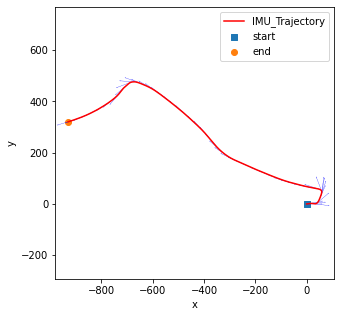

(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

In [3]:
imu_trajectory = imu_localization(timestamp, angular_velocity, linear_velocity)
visualize_trajectory_2d(imu_trajectory, path_name="IMU_Trajectory", show_ori=True)


### Mapping

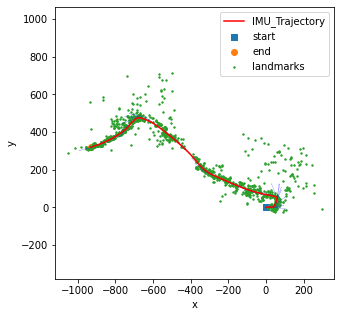

(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

In [4]:
mapping_landmarks = landmark_mapping(timestamp, k_s, cam_T_imu, reduced_features, imu_trajectory, verbose=False)
visualize_trajectory_2d(imu_trajectory, path_name="IMU_Trajectory", show_ori=True, features= mapping_landmarks)

### Visual Inertial SLAM

100
200
300
400
500
600
700
800
900
1000


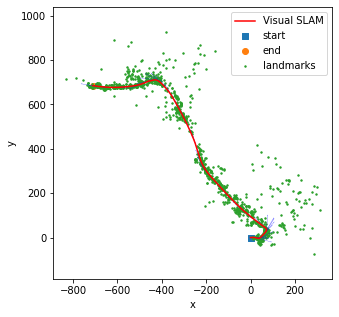

(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

In [5]:
trajectory_v, landmarks_v = visual_inertial_slam(timestamp, angular_velocity, linear_velocity, k_s, cam_T_imu, reduced_features)
visualize_trajectory_2d(trajectory_v, path_name="Visual SLAM", show_ori=True, features= landmarks_v)

### Comparing Results

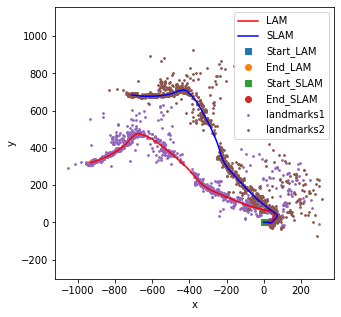

(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

In [6]:
compare_trajectory(imu_trajectory, trajectory_v, path1_name="LAM", path2_name="SLAM", show_ori=False, features1=mapping_landmarks, features2=landmarks_v, save_name="Features")